In this notebook, I have first implemented linearRegression to get the best value of m and b for simple linear regression. <br>
Whole implementation has been divided into two parts.<br> 1st: I gave the same value for m in every epoch and tried to get the best value of b in every epoch which was obtained from LinearRegression. <br>
2nd: Have implemented OOP concept to get the optimized value of both m and b.

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X,y = make_regression(n_features=1, n_targets=1, n_samples=10, n_informative=1, noise=20, random_state=1)
data=pd.DataFrame({'f1':X[:,0],'target':y})
data.head()

,f1,target
0,-2.301539,-17.633565
1,-0.761207,5.375113
2,-0.528172,-23.653796
3,1.744812,19.378131
4,0.319039,11.549990


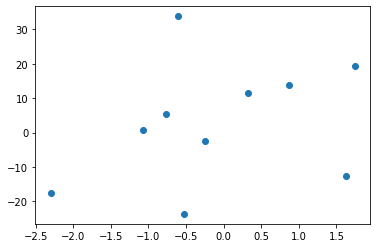

In [3]:
plt.scatter(data['f1'], data['target'])

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(data[['f1']], data['target'])
print(lr.coef_, lr.intercept_)

[4.19734486] 3.1940760375488


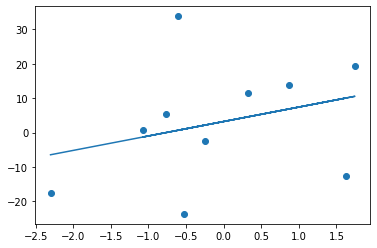

In [6]:
plt.scatter(data['f1'], data['target'])
plt.plot(X,lr.predict(X))

# We are just finding the optimize value of b assuming we already have a best value for m. i.e. 4.197. Our aim is to get the value of 3.19 for b starting with 10

In [7]:
m = 4.197
lrr = 0.01 #learning rate
b_one = 10

In [8]:
#1st epoch
l_one = -2 * np.sum(y - m*X.ravel() - b_one)
l_one #slope

136.1191492437543

In [9]:
#ss = step size
ss_one = lrr*l_one
ss_one

1.361191492437543

In [10]:
b_two = b_one - ss_one
b_two #new value of b

8.638808507562457

In [11]:
yhat_two = m*X.ravel()+b_two
yhat_two

array([-1.0207494 ,  5.44402314,  6.42207166, 15.96178348,  9.97781559,
        6.07126684, 15.456186  , 12.27092433,  4.1355592 ,  7.59220104])

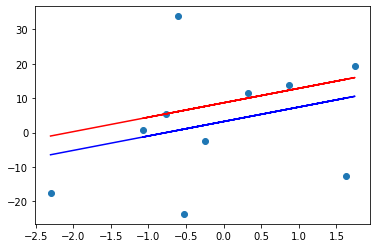

In [12]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='blue')
plt.plot(X, yhat_two, color='red' )

In [13]:
#2nd epoch
l_two = -2 * np.sum(y - m*X.ravel() - b_two)
l_two #slope

108.89531939500344

In [14]:
ss_two = lrr*l_two
ss_two

1.0889531939500345

In [15]:
b_three = b_two - ss_two
b_three

7.549855313612422

In [16]:
yhat_three = m*X.ravel()+b_three
yhat_three

array([-2.1097026 ,  4.35506995,  5.33311847, 14.87283029,  8.8888624 ,
        4.98231365, 14.3672328 , 11.18197113,  3.04660601,  6.50324785])

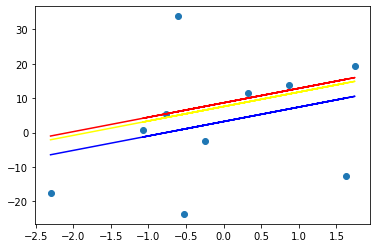

In [17]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='blue')
plt.plot(X, yhat_two, color='red' )
plt.plot(X, yhat_three, color='yellow' )

In [18]:
#3rd epoch
l_three = -2 * np.sum(y - m*X.ravel() - b_three)
l_three #slope

87.11625551600272

In [19]:
ss_three = lrr*l_three
ss_three

0.8711625551600273

In [20]:
b_four = b_three- ss_three
b_four

6.678692758452395

In [21]:
yhat_four = m*X.ravel()+b_four
yhat_four

array([-2.98086515,  3.4839074 ,  4.46195591, 14.00166773,  8.01769984,
        4.11115109, 13.49607025, 10.31080858,  2.17544345,  5.63208529])

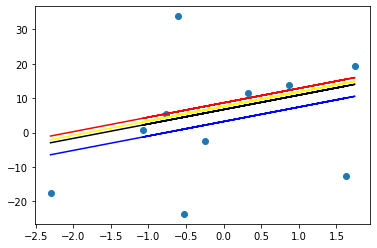

In [22]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='blue')
plt.plot(X, yhat_two, color='red' )
plt.plot(X, yhat_three, color='yellow' )
plt.plot(X, yhat_four, color='black' )

In [23]:
#4th epoch
l_four = -2 * np.sum(y - m*X.ravel() - b_four)
l_four #slope

69.69300441280218

In [24]:
ss_four = lrr*l_four
ss_four

0.6969300441280218

In [25]:
b_fifth = b_three-ss_four
b_fifth #new value of b

6.8529252694844

In [26]:
yhat_fifth= m*X.ravel()+b_fifth
yhat_fifth

array([-2.80663264,  3.65813991,  4.63618843, 14.17590024,  8.19193236,
        4.2853836 , 13.67030276, 10.48504109,  2.34967596,  5.8063178 ])

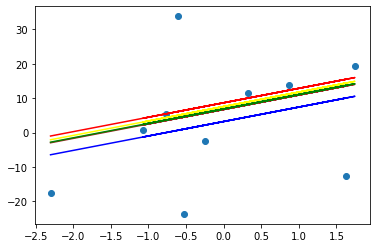

In [27]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='blue')
plt.plot(X, yhat_two, color='red' )
plt.plot(X, yhat_three, color='yellow' )
plt.plot(X, yhat_four, color='brown' )
plt.plot(X, yhat_fifth, color='green' )

We are getting close to blue line and its just 4th epoch

4.197 3.194139675683131


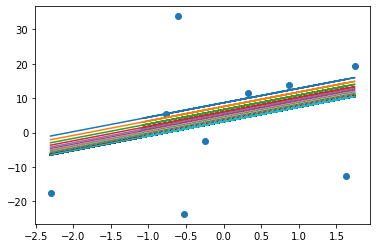

In [69]:
# Implementing whole concept through for loop (epoch concept)

epoch=50
m = 4.197 #(fixed value of slope)
lrr = 0.01 #learning rate
b = 10 #initial value of b (y-intercept)

for i in range(epoch):
    
    l = -2 * np.sum(y - m*X.ravel() - b) #l is calculating the slope
    
    ss = lrr*l #step size
    
    b = b-ss #old b - step size
    
    yhat= m*X.ravel()+b
    
    
    plt.plot(X, lr.predict(X), color='black')
    plt.plot(X, yhat)
    
print(m,b)  
plt.scatter(X,y)    
    
    

# Calculating the Gradient Descent by finding both m and b

In [87]:
class GradientDescentRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.lrr = learning_rate
        self.epochs = epochs
        self.m = 1
        self.b = 1
    
    def fit(self, X, y):
        
        for i in range(self.epochs):
            l_b = -2 * np.sum(y - self.m*X.ravel() - self.b) #sum of squared residual with respect to b
            l_m = -2 * np.sum((y - self.m*X.ravel() - self.b)* X.ravel()) #sum of squared residual with respect to m
            
            ss_b = self.lrr * l_b
            ss_m = self.lrr * l_m
            
            self.b = self.b - ss_b
            self.m = self.m - ss_m
            
            print(f'At epochs {i} m = {self.m}, b={self.b}')
            
        return self.m,self.b
            
    def predict(self, X):
        return self.m * X.ravel() + self.b
            

In [88]:
gd = GradientDescentRegressor(0.01,50)

In [89]:
gd.fit(X,y)

At epochs 0 m = 1.8703274202110431, b=1.3766966219810368
At epochs 1 m = 2.4994643052983863, b=1.6949627957443214
At epochs 2 m = 2.9551438319913395, b=1.9617987182462209
At epochs 3 m = 3.285894975803488, b=2.1841204792767517
At epochs 4 m = 3.526524351320076, b=2.368403780250186
At epochs 5 m = 3.7020258725413364, b=2.520505411407293
At epochs 6 m = 3.8303705994286945, b=2.64559639115483
At epochs 7 m = 3.924498686238195, b=2.748162679172881
At epochs 8 m = 3.9937425724564832, b=2.832044446827831
At epochs 9 m = 4.044844565662237, b=2.9004951435098154
At epochs 10 m = 4.08268501627128, b=2.9562485194837977
At epochs 11 m = 4.110803874933758, b=3.0015863912791168
At epochs 12 m = 4.1317746435235065, b=3.038402986911157
At epochs 13 m = 4.147472800088691, b=3.068263687245128
At epochs 14 m = 4.159268720283525, b=3.092457234094856
At epochs 15 m = 4.168166527259679, b=3.112041244813759
At epochs 16 m = 4.174904179299693, b=3.1278813215680588
At epochs 17 m = 4.18002573873563, b=3.140684

(4.197333687748543, 3.194024912515272)

In [75]:
print(lr.coef_, lr.intercept_)

[4.19734486] 3.1940760375488


sklearn linearRegression and my class base GradientDescentRegressor has the almost same m and b. Cheers...

In [90]:
pred=gd.predict(X)
print(pred)

[-6.46630099e+00 -1.01445596e-03  9.77111824e-01  1.05175821e+01
  4.53313846e+00  6.26279109e-01  1.00119444e+01  6.82642951e+00
 -1.30958243e+00  2.14733423e+00]
